# Bloque 1 - Explorando los datos

## Entendiendo el conjunto de datos

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.3
Versión de numpy: 2.2.5
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


In [2]:
datos = pd.read_csv('flights.csv')
datos

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271
...,...,...,...,...,...,...,...,...,...,...,...
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844


In [3]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [5]:
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


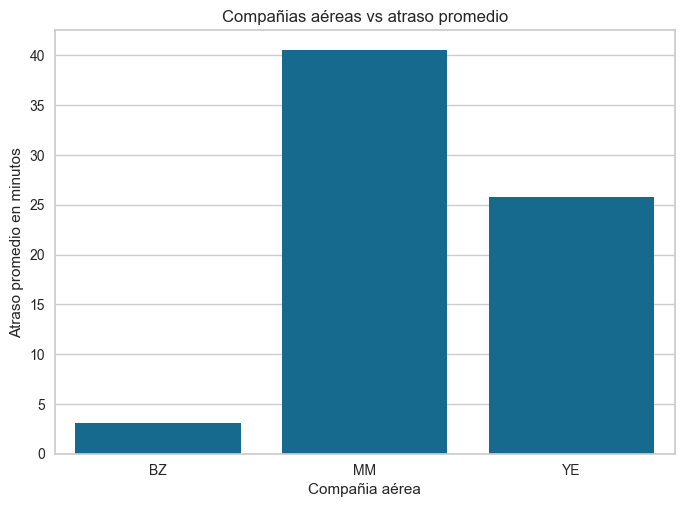

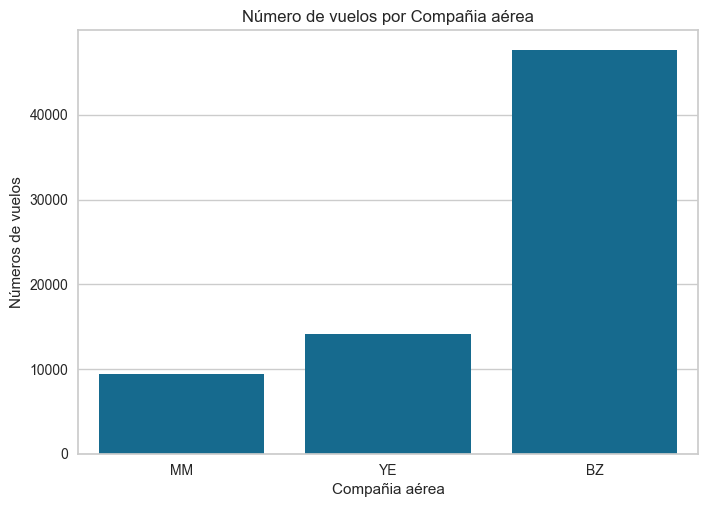

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline',y='delay',data=avg_delay)
plt.title('Compañias aéreas vs atraso promedio')
plt.xlabel('Compañia aérea')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='airline')
plt.title('Número de vuelos por Compañia aérea')
plt.xlabel('Compañia aérea')
plt.ylabel('Números de vuelos')
plt.show()

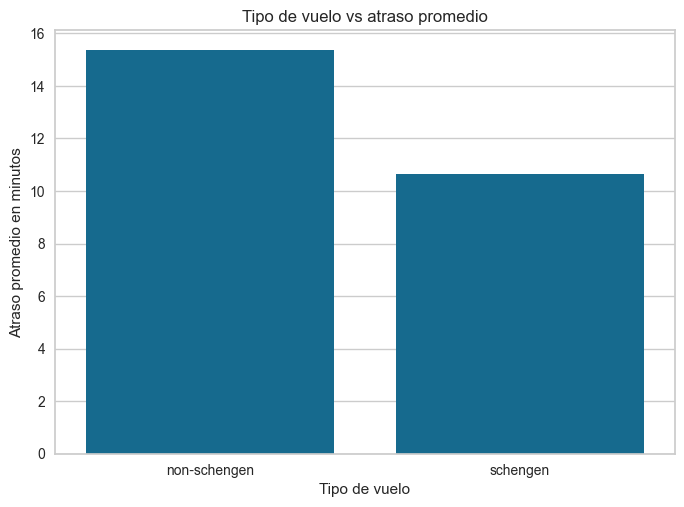

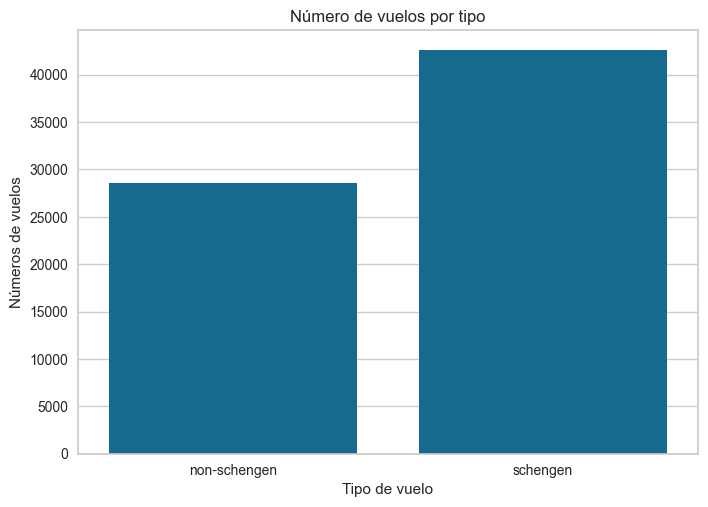

In [10]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen',y='delay',data=avg_delay)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='schengen')
plt.title('Número de vuelos por tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Números de vuelos')
plt.show()

Vuelos de dias feriados

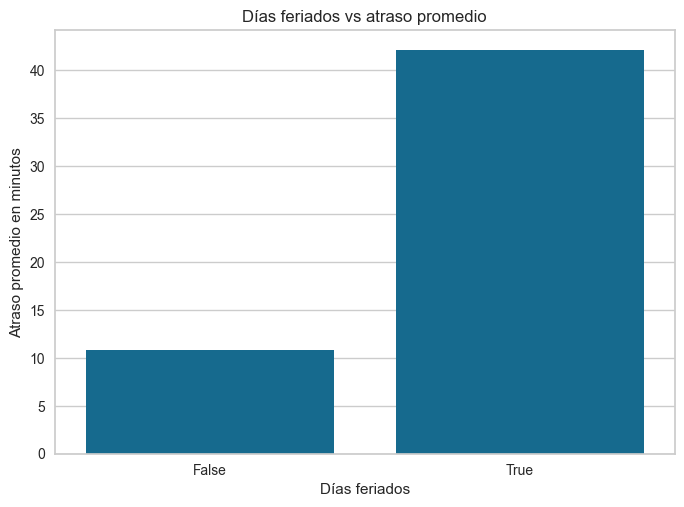

In [12]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday',y='delay',data=avg_delay)
plt.title('Días feriados vs atraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Atraso promedio en minutos')
plt.show()

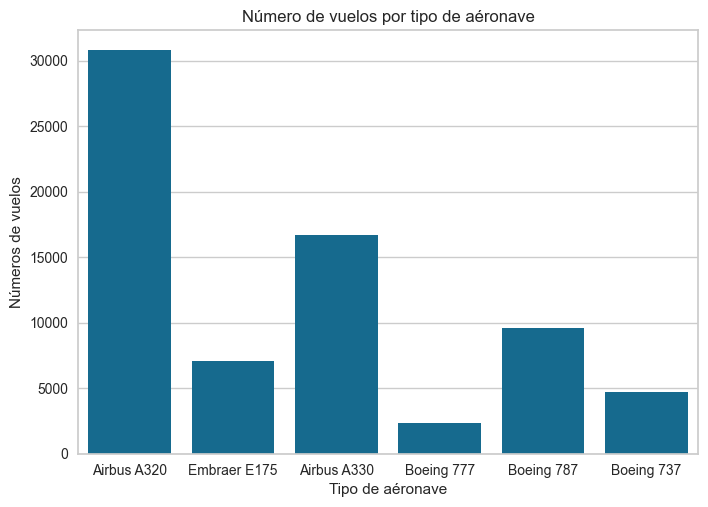

In [14]:
order = datos['aircraft_type'].value_counts().index
sns.countplot(data=datos, x='aircraft_type')
plt.title('Número de vuelos por tipo de aéronave')
plt.xlabel('Tipo de aéronave')
plt.ylabel('Números de vuelos')
plt.show()